In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib


#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
#plt.style.use('fivethirtyeight')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a","Lierbao0","Hedong4"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["Tu","Naxi","Yi","Tujia","She","Miao","Ami"]#,"Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX",'Tibetan','Sherpa']
atib=low+high+tib+eas
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/"

pp = PdfPages(pd+'Fig2B.pdf')

run="run5"
outsource=('1',"Chokhopani","Zongri-a","Han")
pats=['pat1','pat2','pat3','pat4','pat5','pat6','pat7']
targets=atib
outs=[]
mydat={}
logfile=open(pd+run+".qpAdm.out",'r')
print pd+run+".qpAdm.out"
for lineind,line in enumerate(logfile):
    if line[0]=="#": outs.append(line.split()[1].split(',')); continue
    x=line.split()
    if x[0]=="outgroup": header=x; continue
    if tuple(x[:4])!=outsource: continue
    mydat[x[4]]={}
    myary=np.zeros((7,4))
    for patind,pat in enumerate(pats):
        #mypat=x[header.index(pat)]
        myary[patind,0]=float(x[header.index("p_"+pat)])
        myary[patind,1]=float(x[header.index("1_"+pat)])
        myary[patind,2]=float(x[header.index("2_"+pat)])
        myary[patind,3]=float(x[header.index("3_"+pat)])
    mydat[x[4]] = myary.astype('float')

for i in range(3):
    if outsource[i] in atib: atib.remove(outsource[i])

fary=np.zeros((len(atib),3))
for target in atib:
    #print target
    if target not in mydat: print target; continue
    pval=0.05
    for i in range(7):
        if i<=3:
            #print i, mydat[target][i,0]
            if mydat[target][i,0]<pval: continue
            testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
            #print i, sum(testneg)
            if sum(testneg)>0: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
            if i==0: break
        else:
            if pval != 0.05 and i==4: break
            if mydat[target][i,0]<pval: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
    if sum(fary[atib.index(target),:])==0: 
        pval=0
        for i in range(7):
            if i<=3:
                if mydat[target][i,0]<pval: continue
                testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
                if sum(testneg)>0: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
                if i==0: break
            else:
                if pval != 0.0 and i==4: break
                #print target, pval
                if mydat[target][i,0]<pval: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
#print mydat["PukagongmaM5"]
#print mydat["Butaxiongqu"]
#print "Naxi"
#print mydat["Naxi"]
mynames=[i if '_' not in i else i[:-1] for i in atib]
mynames[mynames.index("Lajigai-a")]="Lajigai3"
mynames[mynames.index("Zongri-b")]="ZongriM1"
mynames[mynames.index("Daxiang0")]="Dazhuang0"
mynames[mynames.index("CaixiutangJ2-13")]="ChaxiutangJ2-13"
mynames[mynames.index("Hejiatai")]="Hejiatai1"

fary=np.transpose(fary)
ind=np.arange(len(mynames))
width=0.95
fig = plt.figure(figsize=(12,2),facecolor='white')
rcParams['font.family'] = 'Helvetica-Normal'
ax1=fig.add_subplot(1,1,1)
#print fary
#print fary.shape
p1=ax1.bar(ind,fary[0,:],width,align='center',color=(0.988, 0.553, 0.384),edgecolor='gray')
p2=ax1.bar(ind,fary[1,:],width,bottom=fary[0,:],align='center',color='thistle',edgecolor='gray')
p3=ax1.bar(ind,fary[2,:],width,bottom=fary[0,:]+fary[1,:],align='center',edgecolor='gray',color=(0.40, 0.76, 0.65))
ax1.set_xticks(ind)

ax1.set_xticklabels(mynames,rotation=90,fontname='Helvetica',fontsize=14)
ax1.set_ylim((0,1))
ax1.set_xlim((-0.7,len(atib)-0.3))
ax1.tick_params(length=2,labelsize=12)
#ax1.xaxis.tick_top()
#plt.legend((p1[0],p2[0],p3[0]),('Chokhopani','Zongri-a','Han'),bbox_to_anchor=(0.73,-0.06),ncol=3,frameon=False)
plt.legend((p1[0],p2[0],p3[0]),('West Plateau','East Plateau','Plains'),bbox_to_anchor=(0.15,1),ncol=3,frameon=False,fontsize=16)
#print "Ind\tWP\tEP\tEA"
#for ind,i in enumerate(mynames):
#    print mynames[ind], fary[0,ind], fary[1,ind], fary[2,ind]
#print matplotlib.colors.to_hex('thistle')
#print matplotlib.colors.to_hex((0.988, 0.553, 0.384))
#print matplotlib.colors.to_hex((0.40, 0.76, 0.65))


pp.savefig(bbox_inches = "tight")
pp.close()
#plt.show()

/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/run5.qpAdm.out


In [11]:
from matplotlib.backends.backend_pdf import PdfPages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib


#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
#plt.style.use('fivethirtyeight')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9","Shangluzhuang0",# #"XiahaishiM22",
     "Sanheyi11","Hupo-a", "Hupo14","Hupo8", #
     "Lajigai-a","Qunke1","Wuba","HuoshaogouM117",
     "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
     "Lierbao0","Hedong4"] #"Lajigai2",
high=["PukagongmaM1","PukagongmaM3","PukagongmaM5", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2", # #
     "Chokhopani","Mebrak","Samdzong","YushuSGZ-1","CaixiutangJ2-13"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["Tu","Naxi","Yi","Tujia","She","Miao","Ami"]#,"Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX",'Tibetan','Sherpa']
atib=low+high+tib+eas
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/"

pp = PdfPages(pd+'Fig2B_more.pdf')

run="run5"
outsource=('1',"Chokhopani","Zongri-a","Han")
pats=['pat1','pat2','pat3','pat4','pat5','pat6','pat7']
targets=atib
outs=[]
mydat={}
logfile=open(pd+run+".qpAdm.out",'r')
print pd+run+".qpAdm.out"
for lineind,line in enumerate(logfile):
    if line[0]=="#": outs.append(line.split()[1].split(',')); continue
    x=line.split()
    if x[0]=="outgroup": header=x; continue
    if tuple(x[:4])!=outsource: continue
    mydat[x[4]]={}
    myary=np.zeros((7,4))
    for patind,pat in enumerate(pats):
        #mypat=x[header.index(pat)]
        myary[patind,0]=float(x[header.index("p_"+pat)])
        myary[patind,1]=float(x[header.index("1_"+pat)])
        myary[patind,2]=float(x[header.index("2_"+pat)])
        myary[patind,3]=float(x[header.index("3_"+pat)])
    mydat[x[4]] = myary.astype('float')

for i in range(3):
    if outsource[i] in atib: atib.remove(outsource[i])

fary=np.zeros((len(atib),3))
for target in atib:
    #print target
    if target not in mydat: print target; continue
    pval=0.05
    for i in range(7):
        if i<=3:
            #print i, mydat[target][i,0]
            if mydat[target][i,0]<pval: continue
            testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
            #print i, sum(testneg)
            if sum(testneg)>0: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
            if i==0: break
        else:
            if pval != 0.05 and i==4: break
            if mydat[target][i,0]<pval: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
    if sum(fary[atib.index(target),:])==0: 
        pval=0
        for i in range(7):
            if i<=3:
                if mydat[target][i,0]<pval: continue
                testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
                if sum(testneg)>0: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
                if i==0: break
            else:
                if pval != 0.0 and i==4: break
                #print target, pval
                if mydat[target][i,0]<pval: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
#print mydat["PukagongmaM5"]
#print mydat["Butaxiongqu"]
#print "Naxi"
#print mydat["Naxi"]
mynames=[i if '_' not in i else i[:-1] for i in atib]
mynames[mynames.index("Lajigai-a")]="Lajigai3"
mynames[mynames.index("Zongri-b")]="ZongriM1"
mynames[mynames.index("Daxiang0")]="Dazhuang0"
mynames[mynames.index("CaixiutangJ2-13")]="ChaxiutangJ2-13"
mynames[mynames.index("Hejiatai")]="Hejiatai1"

fary=np.transpose(fary)
ind=np.arange(len(mynames))
width=0.95
fig = plt.figure(figsize=(12,2),facecolor='white')
rcParams['font.family'] = 'Helvetica-Normal'
ax1=fig.add_subplot(1,1,1)
#print fary
#print fary.shape
p1=ax1.bar(ind,fary[0,:],width,align='center',color=(0.988, 0.553, 0.384),edgecolor='gray')
p2=ax1.bar(ind,fary[1,:],width,bottom=fary[0,:],align='center',color='thistle',edgecolor='gray')
p3=ax1.bar(ind,fary[2,:],width,bottom=fary[0,:]+fary[1,:],align='center',edgecolor='gray',color=(0.40, 0.76, 0.65))
ax1.set_xticks(ind)

ax1.set_xticklabels(mynames,rotation=90,fontname='Helvetica',fontsize=14)
ax1.set_ylim((0,1))
ax1.set_xlim((-0.7,len(atib)-0.3))
ax1.tick_params(length=2,labelsize=12)
#ax1.xaxis.tick_top()
#plt.legend((p1[0],p2[0],p3[0]),('Chokhopani','Zongri-a','Han'),bbox_to_anchor=(0.73,-0.06),ncol=3,frameon=False)
plt.legend((p1[0],p2[0],p3[0]),('West Plateau','East Plateau','Plains'),bbox_to_anchor=(0.15,1),ncol=3,frameon=False,fontsize=16)
#print "Ind\tWP\tEP\tEA"
#for ind,i in enumerate(mynames):
#    print mynames[ind], fary[0,ind], fary[1,ind], fary[2,ind]
#print matplotlib.colors.to_hex('thistle')
#print matplotlib.colors.to_hex((0.988, 0.553, 0.384))
#print matplotlib.colors.to_hex((0.40, 0.76, 0.65))


pp.savefig(bbox_inches = "tight")
pp.close()
#plt.show()

/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/run5.qpAdm.out


In [11]:
import numpy as np

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  "Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", "Wenpuju03",
     "Lajigai-a","Lierbao0","Hedong4""Qunke1","Hupo8"] # #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", "PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", "XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
#eas=["Tu","Naxi","Yi","Tujia","She","Miao","Ami"]#,"Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]#,'Tibetan','Sherpa']
atib=eas+tib
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/"
run="run5"
outsource=('1',"Chokhopani","Zongri-a","Han")
pats=['pat1','pat2','pat3','pat4','pat5','pat6','pat7']
targets=atib
outs=[]
mydat={}
logfile=open(pd+run+".qpAdm.out",'r')
newfile=open(pd+run+".qpAdm.out1.subsetEA.out",'w')
print pd+run+".qpAdm.out"
for lineind,line in enumerate(logfile):
    x=line.split()
    if line[0] == '#': continue
    if line[0] == 'o': newfile.write(line); print x; continue
    if tuple(x[:4])!=outsource: continue
    if x[4] not in atib: continue
    newfile.write(line)
    print x
    #break
logfile.close()
newfile.close()

/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/run5.qpAdm.out
['outgroup', 'source1', 'source2', 'source3', 'target', 'pat1', 'p_pat1', '1_pat1', '2_pat1', '3_pat1', 'pat2', 'p_pat2', '1_pat2', '2_pat2', '3_pat2', 'pat3', 'p_pat3', '1_pat3', '2_pat3', '3_pat3', 'pat4', 'p_pat4', '1_pat4', '2_pat4', '3_pat4', 'pat5', 'p_pat5', '1_pat5', '2_pat5', '3_pat5', 'pat6', 'p_pat6', '1_pat6', '2_pat6', '3_pat6', 'pat7', 'p_pat7', '1_pat7', '2_pat7', '3_pat7', 'best_pat1', 'pnest_bestpat1', 'best_pat2', 'pnest_bestpat2', 'best_pat3', 'pnest_bestpat3']
['1', 'Chokhopani', 'Zongri-a', 'Han', 'Tibetan_ChamdoX', '000', '0.169687', '0.485', '0.173', '0.342', '001', '0.0182693', '1.043', '-0.043', '0.000', '010', '0.0715965', '0.847', '-0.000', '0.153', '100', '0.0994194', '0.000', '0.429', '0.571', '011', '0.0168806', '1.000', '-0.000', '0.000', '101', '7.2316e-11', '0.000', '1.000', '0.000', '110', '1.43195e-17', '0.000', '-0.000', '1.000', '000', '-', '100', '0.0699998', '011', '0.00633696']
['

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


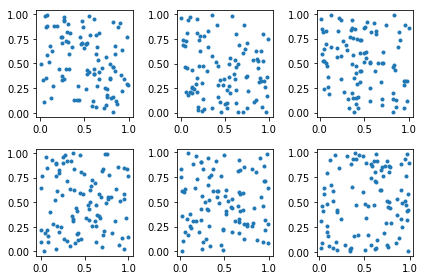

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

for i in range(6):
    ax1=fig.add_subplot(2,3,i+1)
    x=[np.random.random_sample() for j in range(100)]
    y=[np.random.random_sample() for j in range(100)]
    ax1.plot(x,y,'.')

    plt.tight_layout()
plt.show()

In [ ]:
x=np.random

In [129]:
%%writefile /mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/MainFig2C_RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f147.dot

digraph G { 
size = "7.5,10" ;
#labelloc = "t" ; 
#label = "/mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/A11/RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f147 ::      Kos        Red        Tia        Jin       0.041976     0.032101    -0.009875     0.003946    -2.502 " ; 

       Mbuti  [ label = "Mbuti", style="filled" ,fillcolor="cornsilk"  ] ; 
  Kostenki14  [ label = "Kostenki14" , style="filled" ,fillcolor="aliceblue" ] ; 
    Tianyuan  [ label = "Tianyuan", style="filled" ,fillcolor="aliceblue"  ] ; 
         Ami  [ label = "Ami", style="filled" ,fillcolor="cornsilk"  ] ; 
  Chokhopani  [ label = "Chokhopani", style="filled" ,fillcolor="aliceblue"  ] ; 
    ZongriM297  [ label = "ZongriM297", style="filled" ,fillcolor="aliceblue"  ] ; 
  RedilongM3  [ label = "RedilongM3", style="filled" ,fillcolor="aliceblue"  ] ; 
 Jinchankou0  [ label = "Jinchankou0", style="filled" ,fillcolor="aliceblue"  ] ; 
    Daxiang0  [ label = "Daxiang0", style="filled" ,fillcolor="aliceblue"  ] ; 
 XiahaishiM9  [ label = "XiahaishiM9", style="filled" ,fillcolor="aliceblue"  ] ; 

Amir  [ style=invis ] ;    
Amir -> Ami  [ label = "Chokhopani", style="filled" ,fillcolor="aliceblue",style=invis  ] ; 
    
R -> Mbuti [  label = " 85" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
R -> NA [  label = "85" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
NA -> Kostenki14 [  label = " 507" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
NA -> EA [  label = " 27" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
EA -> Tianyuan [  label = " 477" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
R [ fillcolor="black" , style="filled", label="", width=0.05,height=0.05]
NA [ fillcolor="black" , style="filled", label="", width=0.05,height=0.05]
EA [ fillcolor="black", style="filled", label="", width=0.05,height=0.05]

    
#WP
ZONI_A0 -> CHOANI0 [  label = " 1" , color="#fc8d62",fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
CHOANI0 -> CHOANI2 [ style=dashed,  label = " 71%", color="#fc8d62" ,fontcolor="gray66",penwidth=3,arrowhead="none"] ; 
CHOANI0 [ fillcolor="#fc8d62" , color="#fc8d62", style="filled", label="", width=0.05,height=0.05]
CHOANI2 [ fillcolor="#fc8d62" , color="#fc8d62", style="filled", label="", width=0.05,height=0.05]
    
#EA
EA -> ZONI_A0 [  label = " 30" , color="#66c2a6",fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
JINOU02 -> REDGM30 [  label = " 16" , color="#66c2a6" ,fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
REDGM30 -> CHOANI1 [  label = " 4" , color="#66c2a6" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ;  
ZONI_A0 -> JINOU00 [  label = " 23" , color="#66c2a6" ,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
CHOANI1 -> CHOANI2 [ style=dashed,  label = "29%" , color="#66c2a6",fontcolor="gray66",penwidth=3,arrowhead="none"] ; 
JINOU00 -> JINOU02 [ style=dashed,  label = " 37%" , color="#66c2a6",fontcolor="gray66",penwidth=3,arrowhead="none"] ;
REDGM30 -> REDGM32 [ style=dashed,  label = "29%" , color="#66c2a6",fontcolor="gray66",penwidth=3,arrowhead="none"] ; 

ZONI_A0 [ fillcolor="#66c2a6" , color="#66c2a6", style="filled", label="", width=0.05,height=0.05]
JINOU02 [ fillcolor="#66c2a6" , color="#66c2a6", style="filled", label="", width=0.05,height=0.05]
REDGM30 [ fillcolor="#66c2a6" , color="#66c2a6", style="filled", label="", width=0.05,height=0.05]
CHOANI1 [ fillcolor="#66c2a6" , color="#66c2a6", style="filled", label="", width=0.05,height=0.05]
JINOU00 [ fillcolor="#66c2a6" , color="#66c2a6", style="filled", label="", width=0.05,height=0.05]
JINOU02 [ fillcolor="#66c2a6" , color="#66c2a6", style="filled", label="", width=0.05,height=0.05]
    
#EP
    
CHOANI0 -> REDGM31 [  label = " 8" , color=mycolor,fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
REDGM31 -> DAXNG00 [  label = " 4" , color="#794ed4",fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
DAXNG00 -> JINOU01 [  label = "6" , color="#794ed4",fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
JINOU01 -> XIAIM90 [  label = " 8" , color="#794ed4",fontcolor="gray66",penwidth=3 ,arrowhead="none"] ; 
REDGM31 -> REDGM32 [ style=dashed,  label = " 71%" , color="#794ed4",fontcolor="gray66",penwidth=3,arrowhead="none"] ;  
JINOU01 -> JINOU02 [ style=dashed,  label = "63%" , color="#794ed4",fontcolor="gray66",penwidth=3,arrowhead="none"] ; 
REDGM31 [ fillcolor="#d8bfd8" , color="#794ed4", style="filled", label="", width=0.05,height=0.05]
DAXNG00 [ fillcolor="#d8bfd8" , color="#d8bfd8", style="filled", label="", width=0.05,height=0.05]
JINOU01 [ fillcolor="#d8bfd8" , color="#d8bfd8", style="filled", label="", width=0.05,height=0.05]
XIAIM90 [ fillcolor="#d8bfd8" , color="#d8bfd8", style="filled", label="", width=0.05,height=0.05]
REDGM32 [ fillcolor="#d8bfd8" , color="#d8bfd8", style="filled", label="", width=0.05,height=0.05]
    
    
JINOU00 -> Ami [  label = " 18", color="#66c2a6",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ;     
REDGM32 -> RedilongM3 [  label = " 434", color="#d8bfd8",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
DAXNG00 -> ZongriM297 [  label = " 432", color="#d8bfd8",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
CHOANI2 -> Chokhopani [  label = " 449", color="#fc8d62",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
CHOANI1 -> Jinchankou0 [  label = " 419", color="#d8bfd8",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
XIAIM90 -> Daxiang0 [  label = "420", color="#d8bfd8",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
XIAIM90 -> XiahaishiM9 [  label = " 417", color="#d8bfd8",fontcolor="gray66",penwidth=3 ,arrowhead="none" ] ; 
} 

Overwriting /mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/MainFig2C_RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f147.dot


In [130]:
%%bash 
pd="/mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/"
fh="MainFig2C_RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f147"
dot -Tps ${pd}${fh}.dot > ${pd}${fh}.rev.ps
ps2pdf ${pd}${fh}.rev.ps ${pd}${fh}.rev.pdf

In [7]:
%%writefile /mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/MainFig2C_RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f122.dot


digraph G { 
size = "7.5,10" ;
#labelloc = "t" ; 
#label = "/mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/A11/RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f122 ::      Kos        Red        Tia        Xia       0.040547     0.030890    -0.009657     0.003916    -2.466 " ; 

       Mbuti  [ label = "Mbuti", style="filled" ,fillcolor="#e0e0e0" ,fontname="Helvetica" ] ; 
  Kostenki14  [ label = "Kostenki14" , style="filled" ,fillcolor="#f9f9f9" ,fontname="Helvetica"] ; 
    Tianyuan  [ label = "Tianyuan", style="filled" ,fillcolor="#f9f9f9" ,fontname="Helvetica" ] ; 
         Ami  [ label = "Ami", style="filled" ,fillcolor="#c6e9af" ,fontname="Helvetica" ] ; 
  Chokhopani  [ label = "Chokhopani", style="filled" ,fillcolor="#fff5a0" ,fontname="Helvetica" ] ; 
    ZongriM297  [ label = "ZongriM297", style="filled" ,fillcolor="#b0dff2" ,fontname="Helvetica" ] ; 
  RedilongM3  [ label = "RedilongM3", style="filled" ,fillcolor="#fff5a0" ,fontname="Helvetica" ] ; 
 Jinchankou0  [ label = "Jinchankou0", style="filled" ,fillcolor="#b0dff2" ,fontname="Helvetica" ] ; 
    Daxiang0  [ label = "Dazhuang0", style="filled" ,fillcolor="#b0dff2",fontname="Helvetica" ] ; 
 XiahaishiM9  [ label = "XiahaishiM9", style="filled" ,fillcolor="#b0dff2" ,fontname="Helvetica" ] ; 

#Amir  [ style=invis ] ;    
#Amir -> Ami  [ label = "Chokhopani", style="filled" ,fillcolor="aliceblue",style=invis  ] ; 
    
R -> Mbuti [  label = " 85" ,fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
R -> NA [  label = " 85" ,fontcolor="gray66",penwidth=3 ,arrowhead="none" ,fontname="Helvetica"] ; 
NA -> EA [  label = " 27" ,fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
NA -> Kostenki14 [  label = " 507" ,fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
EA -> Tianyuan [  label = " 477" ,fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
R [ fillcolor="black" , style="filled", label="", width=0.05,height=0.05]
NA [ fillcolor="black" , style="filled", label="", width=0.05,height=0.05]
EA [ fillcolor="black", style="filled", label="", width=0.05,height=0.05]    
    
    
##WP

CHOANI2 -> Chokhopani [  label = " 449" , color="#fc8d62",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
CHOANI0 -> CHOANI2 [ style=dashed,  label = " 98%" , color="#fc8d62" ,fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
CHOANI0 [ fillcolor="#d8bfd8" , color="#d8bfd8", style="filled", label="", width=0.05,height=0.05]
CHOANI2 [ fillcolor="#fc8d62" , color="#fc8d62", style="filled", label="", width=0.05,height=0.05]

##EA
EA -> ZONI_A0 [  label = " 31" , color="#c6e9af",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
ZONI_A0 -> REDGM30 [  label = " 33" , color="#c6e9af",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 

REDGM30 -> JINOU00 [  label = "5" , color="#c6e9af",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
CHOANI1 -> CHOANI2 [ style=dashed,  label = "2%" , color="#c6e9af",fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
REDGM30 -> REDGM32 [ style=dashed,  label = "  8%" , color="#c6e9af",fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
JINOU00 -> JINOU02 [ style=dashed,  label = " 22%" , color="#c6e9af",fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
JINOU00 -> Ami [  label = " 2" , color="#c6e9af",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
ZONI_A0 [ fillcolor="#c6e9af" , color="#c6e9af", style="filled", label="", width=0.05,height=0.05]
JINOU02 [ fillcolor="#c6e9af" , color="#c6e9af", style="filled", label="", width=0.05,height=0.05]
REDGM30 [ fillcolor="#c6e9af" , color="#c6e9af", style="filled", label="", width=0.05,height=0.05]
JINOU00 [ fillcolor="#c6e9af" , color="#c6e9af", style="filled", label="", width=0.05,height=0.05]

##EP
ZONI_A0 -> CHOANI0 [  label = "4" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
JINOU02 -> CHOANI1 [  label = " 218" , color="#916edc",fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
CHOANI0 -> REDGM31 [  label = " 7" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
REDGM31 -> DAXNG00 [  label = " 2" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
REDGM32 -> RedilongM3 [  label = " 434" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
DAXNG00 -> ZongriM297 [  label = "433" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
DAXNG00 -> JINOU01 [  label = " 3" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
JINOU01 -> XIAIM90 [  label = " 12" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
CHOANI1 -> Jinchankou0 [  label = " 220" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
XIAIM90 -> Daxiang0 [  label = " 420" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
XIAIM90 -> XiahaishiM9 [  label = "417" , color="#916edc",fontcolor="gray66",penwidth=3 ,arrowhead="none",fontname="Helvetica"] ; 
REDGM31 -> REDGM32 [ style=dashed,  label = " 92%" , color="#916edc",fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
JINOU01 -> JINOU02 [ style=dashed,  label = "78%" , color="#916edc",fontcolor="gray66",penwidth=3,arrowhead="none",fontname="Helvetica"] ; 
REDGM31 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
DAXNG00 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
JINOU01 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
XIAIM90 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
REDGM32 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
CHOANI1 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
JINOU02 [ fillcolor="#916edc" , color="#916edc", style="filled", label="", width=0.05,height=0.05]
}

Overwriting /mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/MainFig2C_RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f122.dot


In [8]:
%%bash 
pd="/mnt/solexa/mel_yang/aPlateau/qpgraph/modelA/"
fh="MainFig2C_RedilongM3.Chokhopani.Jinchankou0.XiahaishiM9.Daxiang0.Zongri-a.A11_n5_n7_n9_f53_f76_f122"
dot -Tps ${pd}${fh}.dot > ${pd}${fh}.rev.ps
ps2pdf ${pd}${fh}.rev.ps ${pd}${fh}.rev.pdf

In [105]:
matplotlib.colors.to_hex('skyblue')

u'#87ceeb'

In [2]:
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a","Lierbao0"] #,"Hedong4"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX",'Tibetan','Sherpa']
for i in low+high+tib: print i

Zongri-a
Zongri-b
Zongri-c
ZongriM32
ZongriM40
Daxiang0
Hedong6
Hejiatai
LiuwanQH-1
XiahaishiM9
Hupo-a
Sanheyi11
Wuba
HuoshaogouM117
Jinchankou0
QijiapingM108-2
QijiapingM89-2
QijiapingM104-2
Lajigai-a
Lierbao0
PukagongmaM1
PukagongmaM5
Butaxiongqu
RedilongM3
XiaoendaM2
Chokhopani
Mebrak
Samdzong
CaixiutangJ2-13
YushuSGZ-1
Tibetan_ChamdoX
Tibetan_LhasaX
Tibetan_NagquX
Tibetan_ShannanX
Tibetan_ShigatseX
Sherpa_ShigatseX
Tibetan
Sherpa
